<a href="https://colab.research.google.com/github/eduardomessias/predictord/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses Moving Average Convergence/Divergence
# to predict when to buy and sell stock

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Import yfinance
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 5.5MB 3.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=b4f535d475186b65d47cc8d584bc96d3b9b54be3cc57e47d9770970158836883
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Get stock ticker
stock_name = 'AAPL'
hist_period = '4mo'

stock = yf.Ticker(stock_name)

# Get stock info
stock.info

{'52WeekChange': 0.84766114,
 'SandP52WeekChange': 0.1401484,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 115.09,
 'askSize': 1000,
 'averageDailyVolume10Day': 112301112,
 'averageVolume': 172305204,
 'averageVolume10days': 112301112,
 'beta': 1.314396,
 'beta3Year': None,
 'bid': 115.05,
 'bidSize': 900,
 'bookValue': 4.218,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1601424000,
 'dayHigh': 116.55,
 'dayLow': 114.28,
 'dividendRate': 0.82,
 'dividendYield': 0.0070999996,
 'earningsQuarterlyGrowth': 0.12,
 'enterpriseToEbitda': 25.38,
 'enterpriseToRevenue': 7.291,
 'enterpriseValue': 1996636684288,
 'exDividendDate': 1596758400,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 115.00657,


In [ ]:
hist = stock.history(period=hist_period)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-24,91.085775,92.031572,89.468688,89.852997,192623200,0.0,0.0
2020-06-25,90.012712,91.085774,89.231619,91.045845,137522400,0.0,0.0
2020-06-26,90.938540,91.165631,88.096161,88.248390,205256800,0.0,0.0
2020-06-29,88.153557,90.379547,87.661943,90.282219,130646000,0.0,0.0
2020-06-30,89.857982,91.330333,89.838021,91.035858,140223200,0.0,0.0
...,...,...,...,...,...,...,...
2020-10-19,119.959999,120.419998,115.660004,115.980003,120639300,0.0,0.0
2020-10-20,116.199997,118.980003,115.629997,117.510002,124423700,0.0,0.0
2020-10-21,116.669998,118.709999,116.449997,116.870003,89946000,0.0,0.0


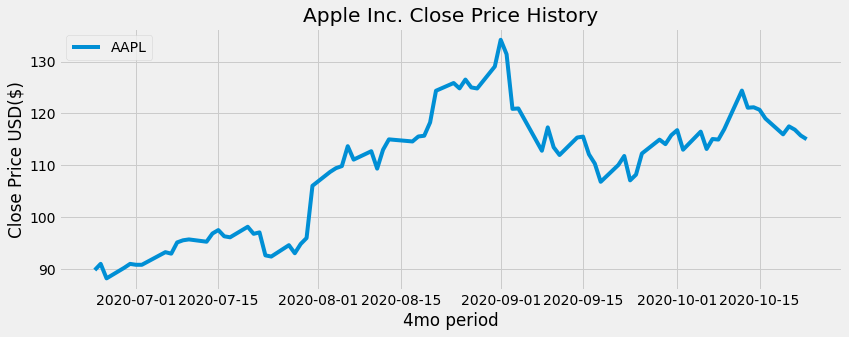

In [ ]:
# Visualize historical data
plt.figure(figsize=(12.5, 4.5))
plt.plot(hist['Close'], label = stock_name)
plt.title('{} Close Price History'.format(stock.info['longName']))
plt.xlabel('{} period'.format(hist_period))
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Calc MACD signal line indicators
# Short-time exponential moving average (EMA)
short_ema = hist.Close.ewm(span=12,adjust=False).mean()
long_ema = hist.Close.ewm(span=26,adjust=False).mean()

# Calculate MACD
macd = short_ema - long_ema

# Calculate signal line
signal = macd.ewm(span=9,adjust=False).mean()

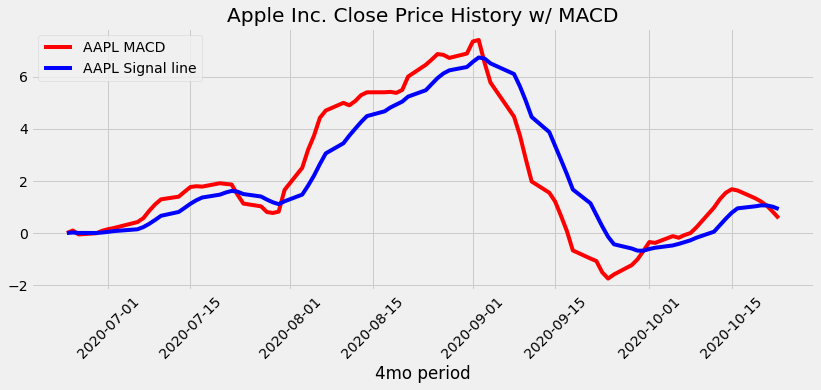

In [ ]:
 # Visualize historical data
plt.figure(figsize=(12.5, 4.5))
plt.plot(hist.index, macd, label = '{} MACD'.format(stock_name), color='red')
plt.plot(hist.index, signal, label = '{} Signal line'.format(stock_name), color='blue')
# plt.plot(hist['Close'], label = 'MSFT')
plt.title('{} Close Price History w/ MACD'.format(stock.info['longName']))
plt.xlabel('{} period'.format(hist_period))
plt.xticks(rotation=45)
# plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Prepare data to plot
data =  hist.copy()
data['MACD'] = macd
data['Signal'] = signal
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal
Date,,,,,,,,,
2020-06-24,91.085775,92.031572,89.468688,89.852997,192623200,0.0,0.0,0.000000,0.000000
2020-06-25,90.012712,91.085774,89.231619,91.045845,137522400,0.0,0.0,0.095156,0.019031
2020-06-26,90.938540,91.165631,88.096161,88.248390,205256800,0.0,0.0,-0.054535,0.004318
2020-06-29,88.153557,90.379547,87.661943,90.282219,130646000,0.0,0.0,-0.008950,0.001664
2020-06-30,89.857982,91.330333,89.838021,91.035858,140223200,0.0,0.0,0.086987,0.018729
...,...,...,...,...,...,...,...,...,...
2020-10-19,119.959999,120.419998,115.660004,115.980003,120639300,0.0,0.0,1.334772,1.024877
2020-10-20,116.199997,118.980003,115.629997,117.510002,124423700,0.0,0.0,1.207842,1.061470
2020-10-21,116.669998,118.709999,116.449997,116.870003,89946000,0.0,0.0,1.043577,1.057891


In [ ]:
def buy_sell(data):
  bid = []
  ask = []
  flag = -1

  for i in range(len(data)):
    b = np.nan
    a = np.nan

    if data['MACD'][i] > data['Signal'][i] and flag != 1:
      b = data['Close'][i]
      flag = 1

    if data['MACD'][i] < data['Signal'][i] and flag != 0:
      a = data['Close'][i]
      flag = 0

    bid.append(b)
    ask.append(a)

  return (bid, ask)


In [ ]:
buy_sell = buy_sell(data)

data['BID'] = buy_sell[0]
data['ASK'] = buy_sell[1]

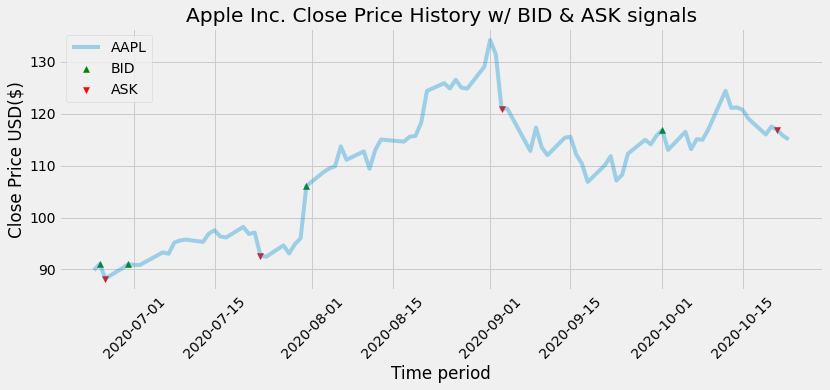

In [ ]:
# Visualize data and strategy
plt.figure(figsize=(12.2,4.5))
#plt.plot(data['MSFT'], label = 'MSFT', alpha = .35)
#plt.plot(data['SMA30'], label = 'SMA 30', alpha = .35)
#plt.plot(data['SMA100'], label = 'SMA 100', alpha = .35)
plt.plot(hist['Close'], label = stock_name, alpha=.35)
plt.scatter(data.index, data['BID'], label = 'BID', marker = '^', color = 'green')
plt.scatter(data.index, data['ASK'], label = 'ASK', marker = 'v', color = 'red')
plt.title('{} Close Price History w/ BID & ASK signals'.format(stock.info['longName']))
plt.xlabel('Time period')
plt.xticks(rotation=45)
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()